In [2]:
import numpy as np
import pandas as pd
from additional import DatasetGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError

from sklearn.metrics import mean_squared_error
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler


import warnings
warnings.filterwarnings('ignore')

In [3]:
RELIANCE = pd.read_csv("D:/time-series-stock-pred/equities/RELIANCE.csv")

In [4]:
RELIANCE.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
7110,2024-04-24,2927.000000,2937.100098,2899.00,2900.350098,2900.350098,5231388
7111,2024-04-25,2885.000000,2935.949951,2883.00,2919.949951,2919.949951,7971963
7112,2024-04-26,2927.899902,2930.000000,2900.00,2905.100098,2905.100098,4706924
7113,2024-04-29,2900.000000,2935.800049,2900.00,2930.050049,2930.050049,3623987
7114,2024-04-30,2936.000000,2966.149902,2925.75,2934.000000,2934.000000,5736657


In [5]:
RELIANCE.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,14.638248,14.716795,14.541850,14.691803,9.302441,52060684
1,1996-01-02,14.656100,14.727506,14.470444,14.577553,9.230103,84371654
2,1996-01-03,14.816763,15.491551,14.656100,14.688232,9.300180,104661939
3,1996-01-04,14.548991,14.595404,14.356194,14.552561,9.214282,108450132
4,1996-01-05,14.495436,14.495436,14.327632,14.452592,9.150982,83354233


In [6]:
RELIANCE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7115 non-null   object 
 1   Open       7115 non-null   float64
 2   High       7115 non-null   float64
 3   Low        7115 non-null   float64
 4   Close      7115 non-null   float64
 5   Adj Close  7115 non-null   float64
 6   Volume     7115 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 389.2+ KB


In [7]:
RELIANCE["Date"] = pd.to_datetime(RELIANCE["Date"])

In [8]:
ed_date = '2023-06-01'
RELIANCE_Train_X, RELIANCE_Train_Y, RELIANCE_Test_X, RELIANCE_Test_Y,scale = DatasetGenerator.Dataset(RELIANCE, ed_date)

In [9]:
def LSTM_model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [11]:
lstm = LSTM_model()
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 200)            161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 200)               40200     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 5)                 255       
                                                                 
Total params: 548,005
Trainable params: 548,005
Non-trai

In [12]:
RELIANCE['Date'][RELIANCE['Date'] >= '2023-06-13']

6899   2023-06-13
6900   2023-06-14
6901   2023-06-15
6902   2023-06-16
6903   2023-06-19
          ...    
7110   2024-04-24
7111   2024-04-25
7112   2024-04-26
7113   2024-04-29
7114   2024-04-30
Name: Date, Length: 216, dtype: datetime64[ns]

In [13]:
lstm.compile(optimizer=Adam(learning_rate=3e-4), loss = 'mse', metrics=[RootMeanSquaredError()])

In [14]:
history = lstm.fit(RELIANCE_Train_X,RELIANCE_Train_Y, epochs= 100,validation_data = (RELIANCE_Test_X, RELIANCE_Test_Y))

Epoch 1/100
44/44 [==============================] - 4s 26ms/step - loss: 0.0533 - root_mean_squared_error: 0.2308 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1576
Epoch 2/100
44/44 [==============================] - 1s 17ms/step - loss: 0.0015 - root_mean_squared_error: 0.0392 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0504
Epoch 3/100
44/44 [==============================] - 1s 17ms/step - loss: 2.5218e-04 - root_mean_squared_error: 0.0159 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0488
Epoch 4/100
44/44 [==============================] - 1s 18ms/step - loss: 2.0504e-04 - root_mean_squared_error: 0.0143 - val_loss: 7.4279e-04 - val_root_mean_squared_error: 0.0273
Epoch 5/100
44/44 [==============================] - 1s 18ms/step - loss: 1.8461e-04 - root_mean_squared_error: 0.0136 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0322
Epoch 6/100
44/44 [==============================] - 1s 17ms/step - loss: 1.8526e-04 - root_mean_squared_error: 0.0136 - val

In [15]:
history_dict = history.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

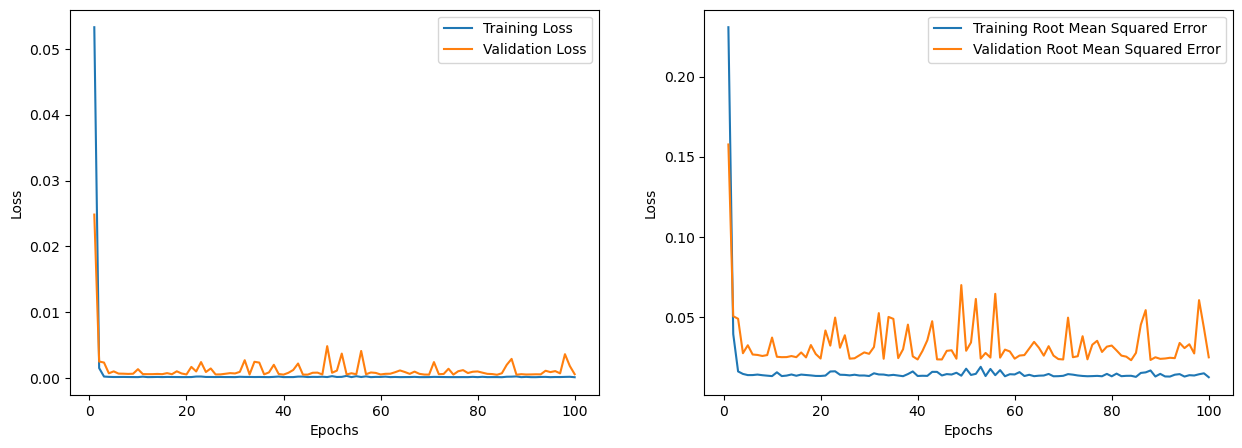

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [17]:
prediction_scaled = lstm.predict(RELIANCE_Test_X)

2/2 [==============================] - 0s 5ms/step


In [18]:
prediction_scaled = prediction_scaled.reshape(-1, 1)

In [19]:
prediction = prediction_scaled/scale

In [20]:
RELIANCE_Test_Y = RELIANCE_Test_Y/scale

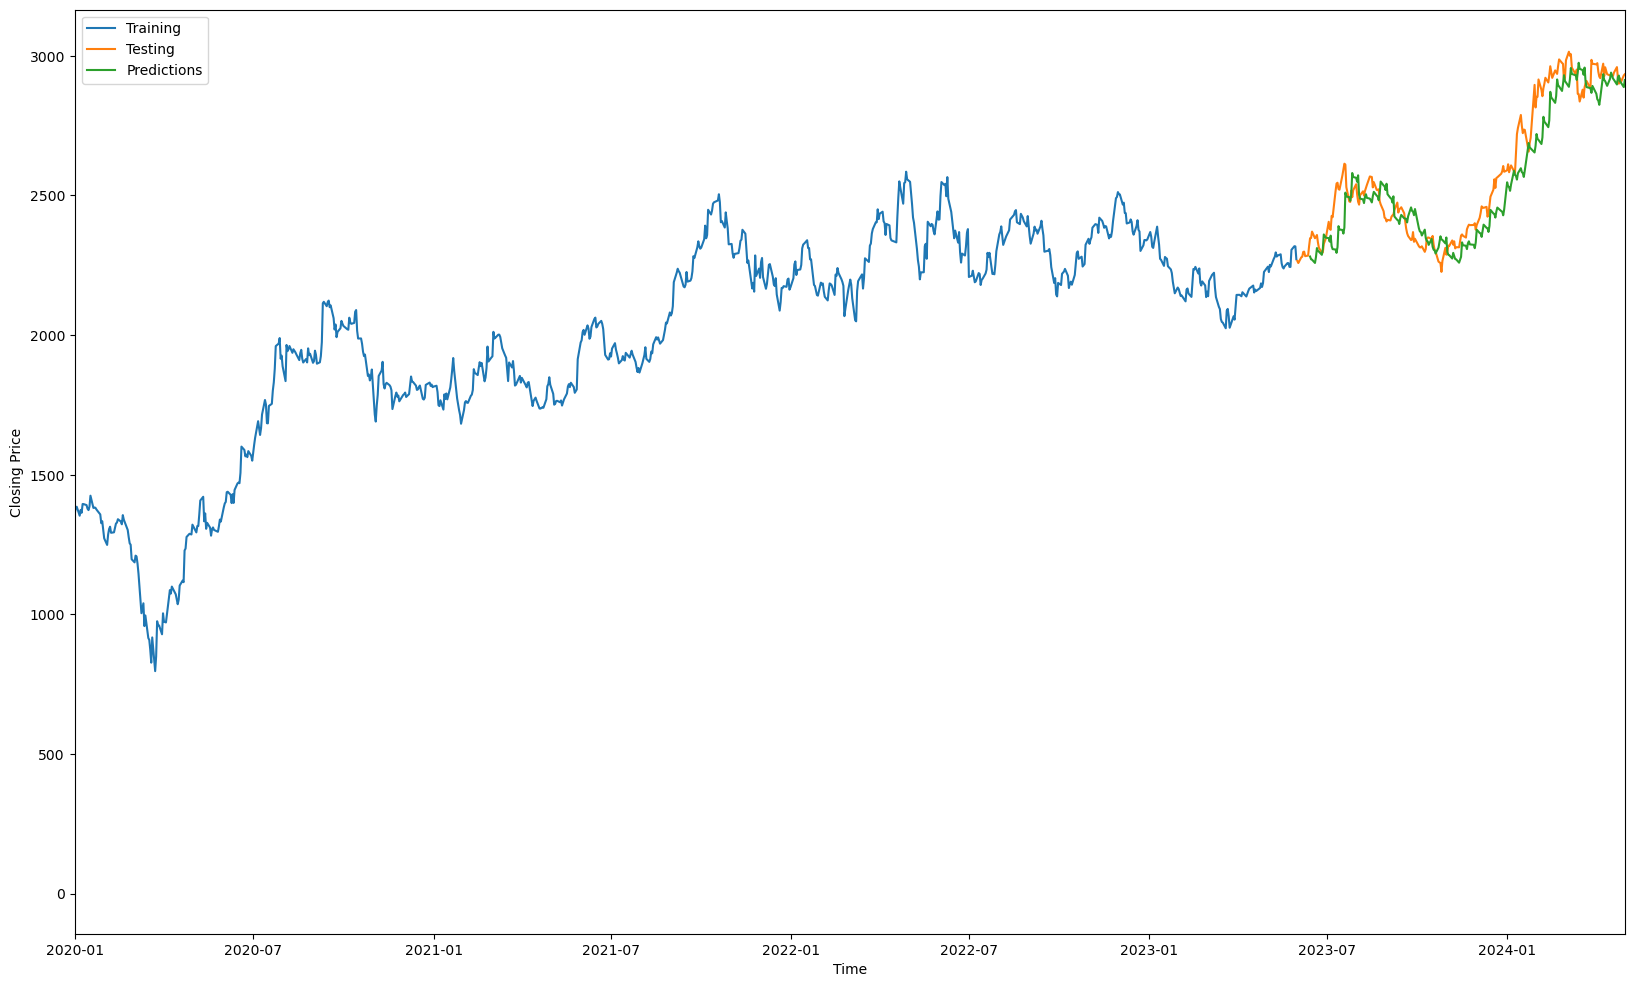

In [21]:
plt.figure(figsize=(20,12))
plt.plot(RELIANCE['Date'][RELIANCE['Date'] < '2023-06-01'], RELIANCE['Adj Close'][RELIANCE['Date'] < '2023-06-01'], label = 'Training')
plt.plot(RELIANCE['Date'][RELIANCE['Date'] >= '2023-06-01'], RELIANCE['Adj Close'][RELIANCE['Date'] >= '2023-06-01'], label = 'Testing')
plt.plot(RELIANCE['Date'][RELIANCE['Date'] >= '2023-06-14'], prediction.reshape(-1), label = 'Predictions')
plt.xlim(pd.Timestamp("2020-01-01"),pd.Timestamp("2024-04-30"))
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [22]:
RELIANCE_Test_Y.reshape(-1,5).shape

(43, 5)

In [23]:
prediction.reshape(-1,5).shape

(43, 5)

In [24]:
import math
rmse = math.sqrt(mean_squared_error(RELIANCE_Test_Y.reshape(-1, 5),prediction.reshape(-1,5)))
mape = np.mean(np.abs(prediction.reshape(-1,5) - RELIANCE_Test_Y.reshape(-1, 5))/np.abs(RELIANCE_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 63.655633198042246
MAPE: 0.019615324588987623


In [25]:
lstm.save('./mod/')

INFO:tensorflow:Assets written to: ./mod/assets


In [81]:
lstm.save("model.h5")

## Prediction for test

In [157]:
df_training = pd.DataFrame(RELIANCE_Train_X.reshape(-1,1),columns=['Close'])
df_testing = pd.DataFrame(RELIANCE_Test_X.reshape(-1,1),columns=['Close'])
print(df_training.shape,df_testing.shape)

(6885, 1) (210, 1)


In [158]:
past_500_days = df_training.tail(500) #past 500 days
final_df = past_500_days._append(df_testing,ignore_index=True)

In [159]:
input_data = final_df
input_data = np.array(input_data)
input_data.shape

(710, 1)

In [160]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [161]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape,y_test.shape)

(610, 100, 1) (610,)


In [162]:
y_predicted = lstm.predict(x_test)

20/20 [==============================] - 1s 36ms/step


In [163]:
y_predicted = y_predicted/scale
y_test = y_test/scale

In [164]:
y_predicted

array([[4177.4453, 4158.348 , 4182.704 , 4117.8945, 4165.85  ],
       [4201.1978, 4181.967 , 4206.5444, 4141.18  , 4188.4424],
       [4224.556 , 4205.296 , 4230.1807, 4164.7344, 4212.433 ],
       ...,
       [4933.9287, 4909.0723, 4936.246 , 4850.4614, 4909.417 ],
       [4939.559 , 4914.579 , 4942.2227, 4855.9077, 4916.387 ],
       [4939.661 , 4914.714 , 4942.23  , 4856.0996, 4916.7817]],
      dtype=float32)

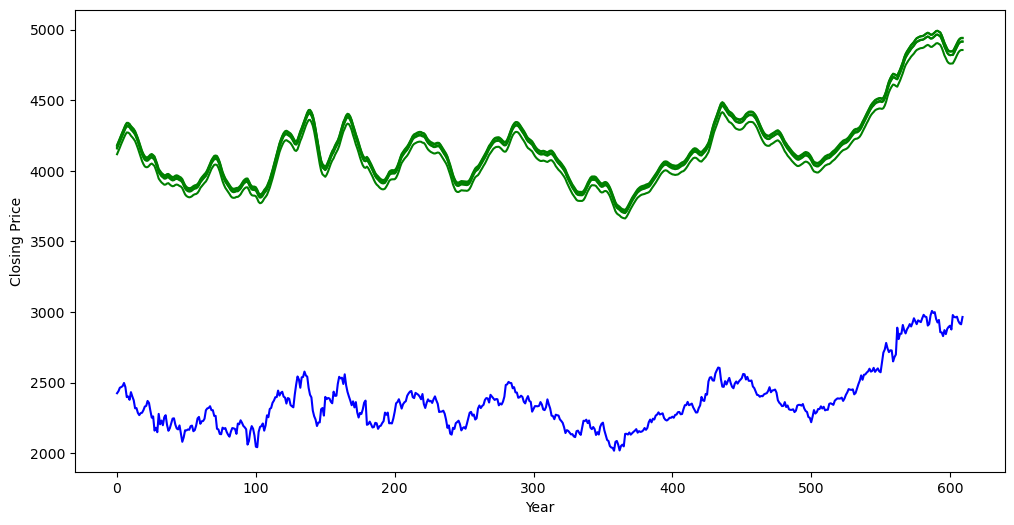

In [165]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'g',label = 'Predicted Price')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.show()


## Model Optimization

In [65]:
import math
def scheduler(epoch):

  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150)
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)

  return lrate

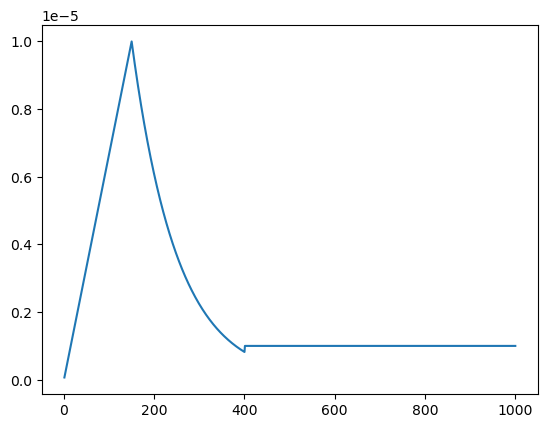

In [66]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [67]:
opt_lstm = LSTM_model()
opt_lstm.compile(optimizer=Adam(), loss = 'mse', metrics=RootMeanSquaredError())

In [68]:
history_opt = opt_lstm.fit(RELIANCE_Train_X, RELIANCE_Train_Y, epochs = 1000, validation_data = (RELIANCE_Test_X, RELIANCE_Test_Y), callbacks=LearningRateScheduler(scheduler
                                                                                                                                                                    ))

Epoch 1/1000
44/44 [==============================] - 4s 36ms/step - loss: 0.0987 - root_mean_squared_error: 0.3141 - val_loss: 0.9912 - val_root_mean_squared_error: 0.9956 - lr: 0.0000e+00
Epoch 2/1000
44/44 [==============================] - 1s 30ms/step - loss: 0.0986 - root_mean_squared_error: 0.3141 - val_loss: 0.9911 - val_root_mean_squared_error: 0.9955 - lr: 6.6667e-08
Epoch 3/1000
44/44 [==============================] - 1s 28ms/step - loss: 0.0986 - root_mean_squared_error: 0.3140 - val_loss: 0.9909 - val_root_mean_squared_error: 0.9954 - lr: 1.3333e-07
Epoch 4/1000
44/44 [==============================] - 1s 28ms/step - loss: 0.0986 - root_mean_squared_error: 0.3140 - val_loss: 0.9905 - val_root_mean_squared_error: 0.9952 - lr: 2.0000e-07
Epoch 5/1000
44/44 [==============================] - 1s 28ms/step - loss: 0.0985 - root_mean_squared_error: 0.3139 - val_loss: 0.9899 - val_root_mean_squared_error: 0.9950 - lr: 2.6667e-07
Epoch 6/1000
44/44 [==============================

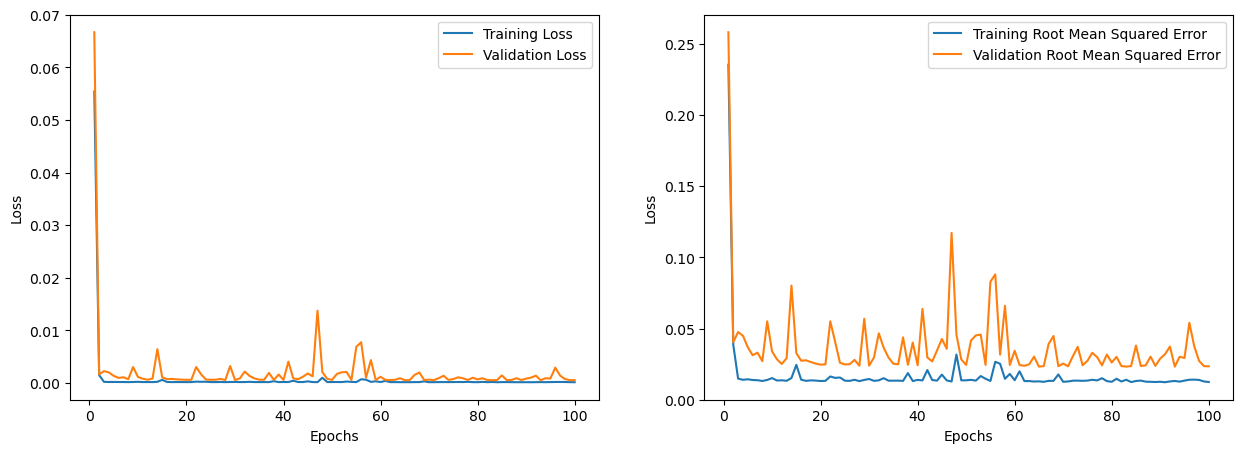

In [69]:
history_dict_2 = history.history

loss = history_dict_2["loss"]
root_mean_squared_error = history_dict_2["root_mean_squared_error"]
val_loss = history_dict_2["val_loss"]
val_root_mean_squared_error = history_dict_2["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [70]:
prediction_1 =opt_lstm.predict(RELIANCE_Test_X) 

2/2 [==============================] - 0s 6ms/step


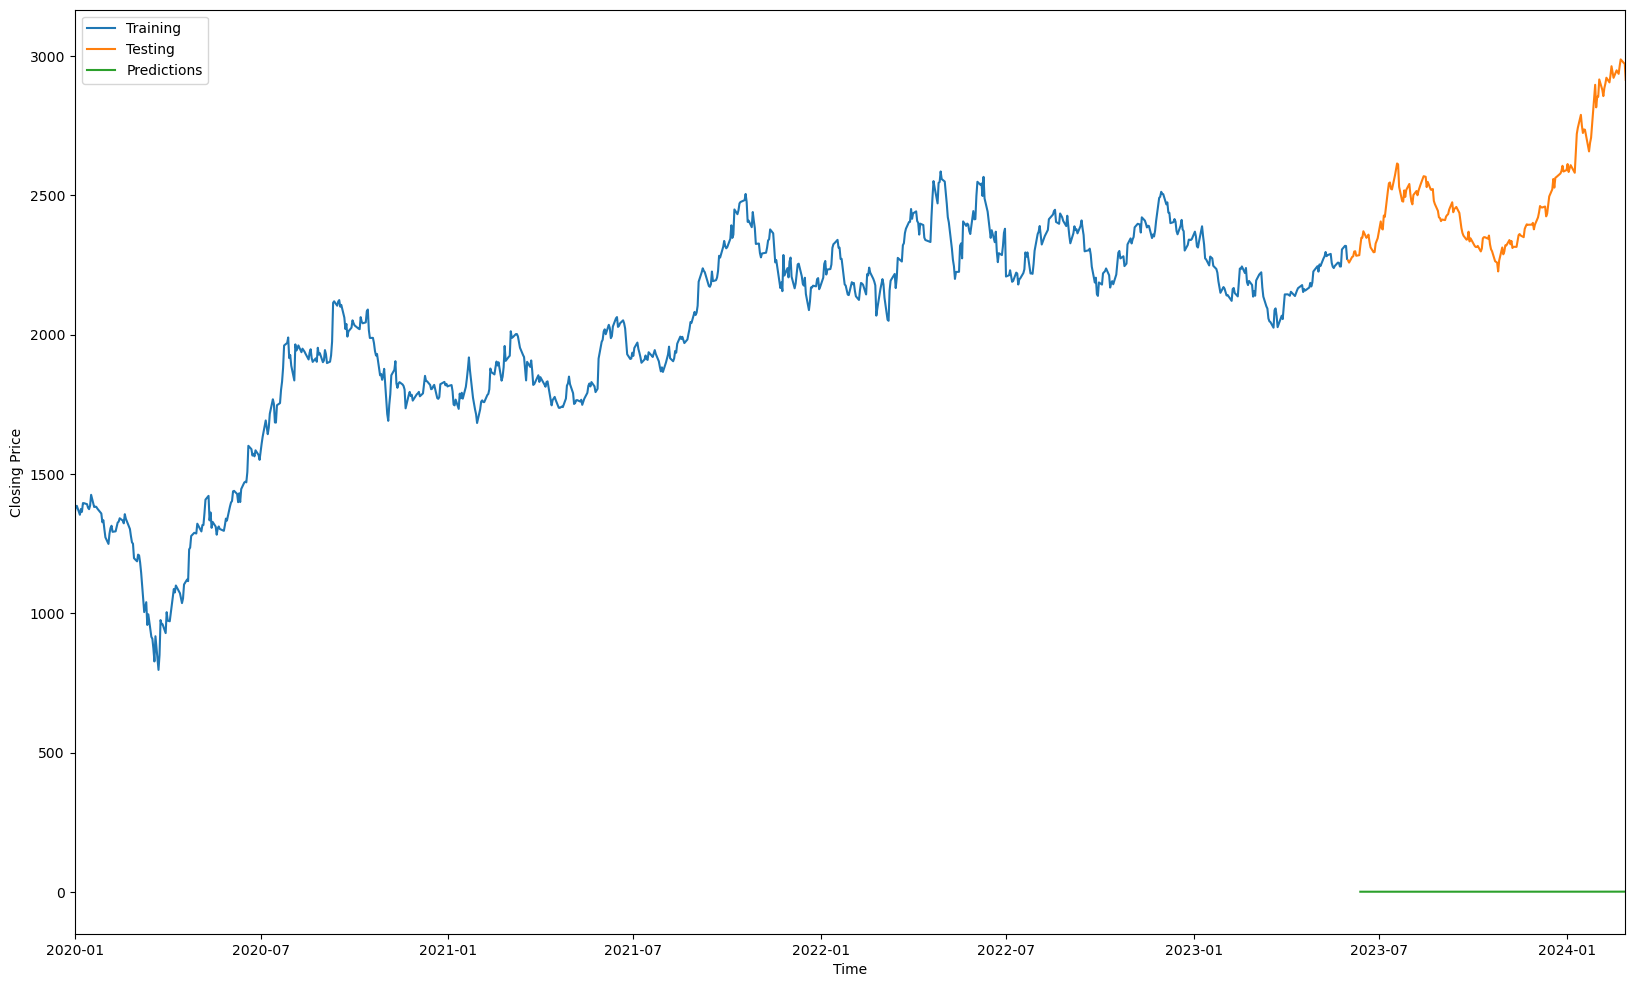

In [71]:
plt.figure(figsize=(20,12))
plt.plot(RELIANCE['Date'][RELIANCE['Date'] < '2023-06-01'], RELIANCE['Adj Close'][RELIANCE['Date'] < '2023-06-01'], label = 'Training')
plt.plot(RELIANCE['Date'][RELIANCE['Date'] >= '2023-06-01'], RELIANCE['Adj Close'][RELIANCE['Date'] >= '2023-06-01'], label = 'Testing')
plt.plot(RELIANCE['Date'][RELIANCE['Date'] >= '2023-06-13'], prediction_1.reshape(-1), label = 'Predictions')
plt.xlim(pd.Timestamp("2020-01-01"),pd.Timestamp("2024-02-27"))
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [72]:
import math
rmse = math.sqrt(mean_squared_error(RELIANCE_Test_Y.reshape(-1, 5),prediction_1))
mape = np.mean(np.abs(prediction_1 - RELIANCE_Test_Y.reshape(-1, 5))/np.abs(RELIANCE_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 0.024703299409753767
MAPE: 0.020083583072648976


## Optimization - 2 

In [73]:
opt_lstm_2 = LSTM_model()
opt_lstm_2.compile(optimizer=Adam(learning_rate=0.001), loss = 'mse', metrics=RootMeanSquaredError())

In [74]:
history_opt_2 = opt_lstm_2.fit(RELIANCE_Train_X, RELIANCE_Train_Y, epochs = 1000, validation_data = (RELIANCE_Test_X, RELIANCE_Test_Y))

Epoch 1/1000
44/44 [==============================] - 4s 37ms/step - loss: 0.0283 - root_mean_squared_error: 0.1682 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0739
Epoch 2/1000
44/44 [==============================] - 1s 30ms/step - loss: 4.0367e-04 - root_mean_squared_error: 0.0201 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0422
Epoch 3/1000
44/44 [==============================] - 1s 28ms/step - loss: 2.3527e-04 - root_mean_squared_error: 0.0153 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0325
Epoch 4/1000
44/44 [==============================] - 1s 28ms/step - loss: 1.9588e-04 - root_mean_squared_error: 0.0140 - val_loss: 6.0690e-04 - val_root_mean_squared_error: 0.0246
Epoch 5/1000
44/44 [==============================] - 1s 30ms/step - loss: 1.9864e-04 - root_mean_squared_error: 0.0141 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0337
Epoch 6/1000
44/44 [==============================] - 1s 27ms/step - loss: 2.3296e-04 - root_mean_squared_error: 0.

KeyboardInterrupt: 